Чупров Максим

Лабораторная работа №3 по курсу "Цифровая обработка сигналов"

In [153]:
import random

import numpy as np
from scipy import fft

import matplotlib.pyplot as plt


%matplotlib inline

In [154]:
random.seed(42)
np.random.seed(42)

# Task 1

Функция косинуса

In [155]:
def f_cos(x: np.array, freq: float, A=1.0):
    return A * np.cos(2 * np.pi * freq * x)

Создаем сигнал из трех косинусоид с частотами 50, 150 и 450 Гц

In [156]:
freq_1 = 50
freq_2 = 150
freq_3 = 450
fmax = freq_3 * 3
T = 1 / fmax
N = 1700

x = np.linspace(0, N * T, num=N, endpoint=True)
y = f_cos(x, freq_1) + f_cos(x, freq_2) + f_cos(x, freq_3)

Выводим график сигнала

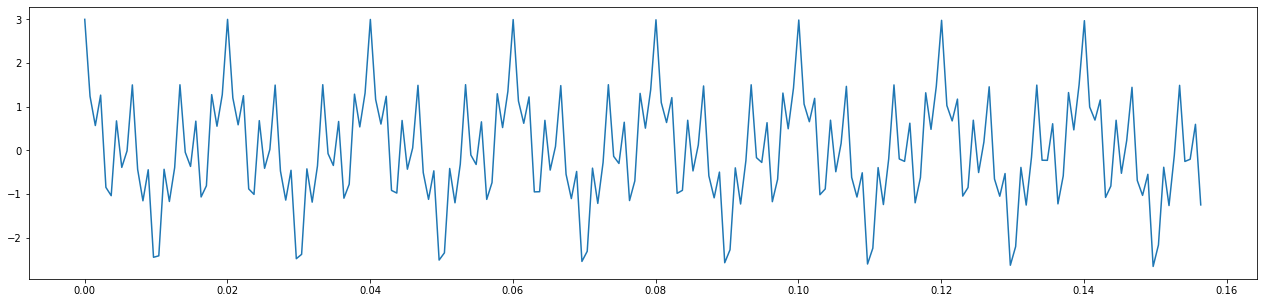

In [157]:
plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], y[0:N//8])
plt.show()

Производим преобразование Фурье

In [158]:
yff = fft.fft(y)
yf = abs(yff[:N//2])
xff = fft.fftfreq(N, T)
xf = xff[:N//2]

Выводим спектр сигнала

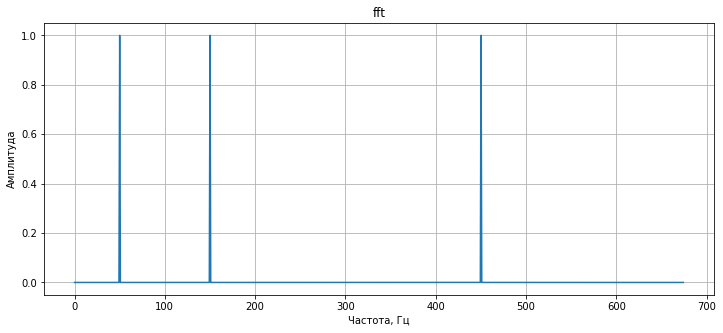

In [159]:
plt.figure(figsize=(12, 5))

plt.plot(xf, yf * 2 / N)
plt.title("fft")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()

plt.show()

# Task 2

Фильтр Баттерворта (ФНЧ)

In [160]:
def low_pass_filter(freq, freq_c):
    return (freq_c ** 2) / (-freq**2 + np.sqrt(2) * freq_c * freq * 1j + freq_c ** 2)

freq_filter = abs(low_pass_filter(xff, 70))

Выводим график ФНЧ

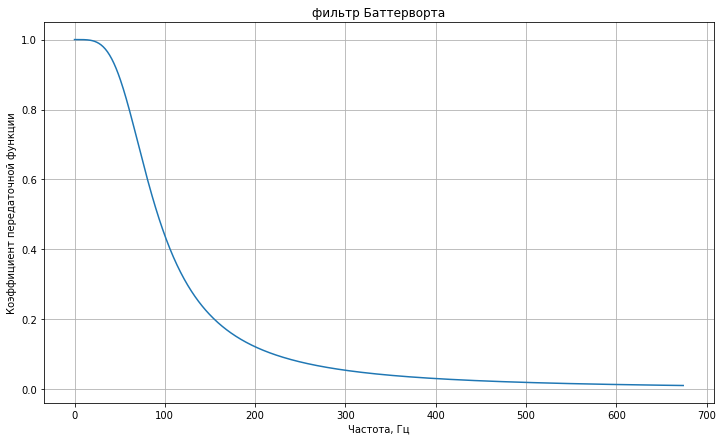

In [161]:
plt.figure(figsize=(12, 7))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.grid()

plt.show()

Фильтруем сигнал

In [162]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ФНЧ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


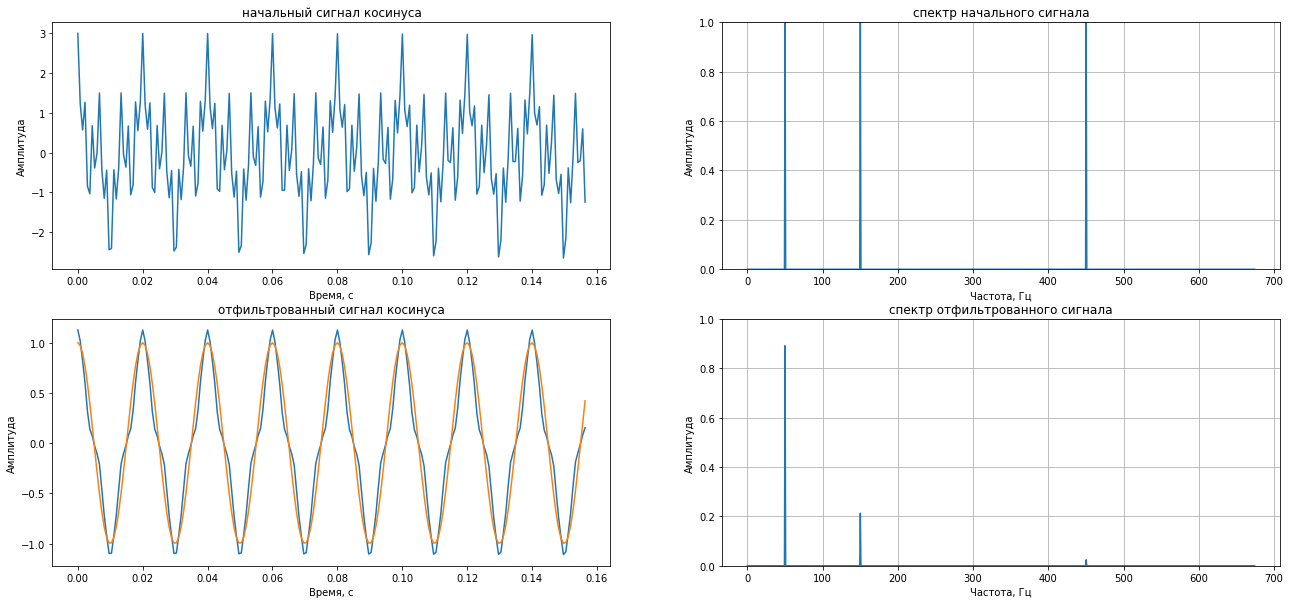

In [163]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    if i == 1: ax_row[0].plot(x[:N//8], f_cos(x, freq_1)[:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

# Task 3

Фильтр Баттерворта (ФВЧ)

In [195]:
def high_pass_filter(freq, freq_c):
    return (freq ** 2) / (-freq_c**2 + np.sqrt(2) * freq_c * freq * 1j + freq ** 2)

freq_filter = abs(high_pass_filter(xff, 370))

Выводим график ФВЧ

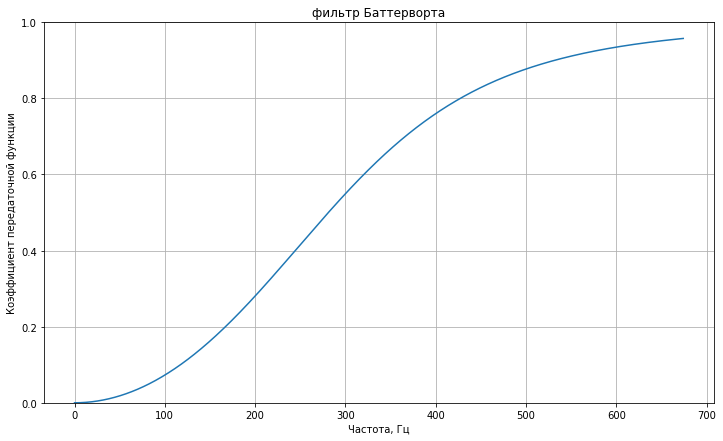

In [196]:
plt.figure(figsize=(12, 7))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

Фильтруем сигнал

In [197]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ФВЧ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


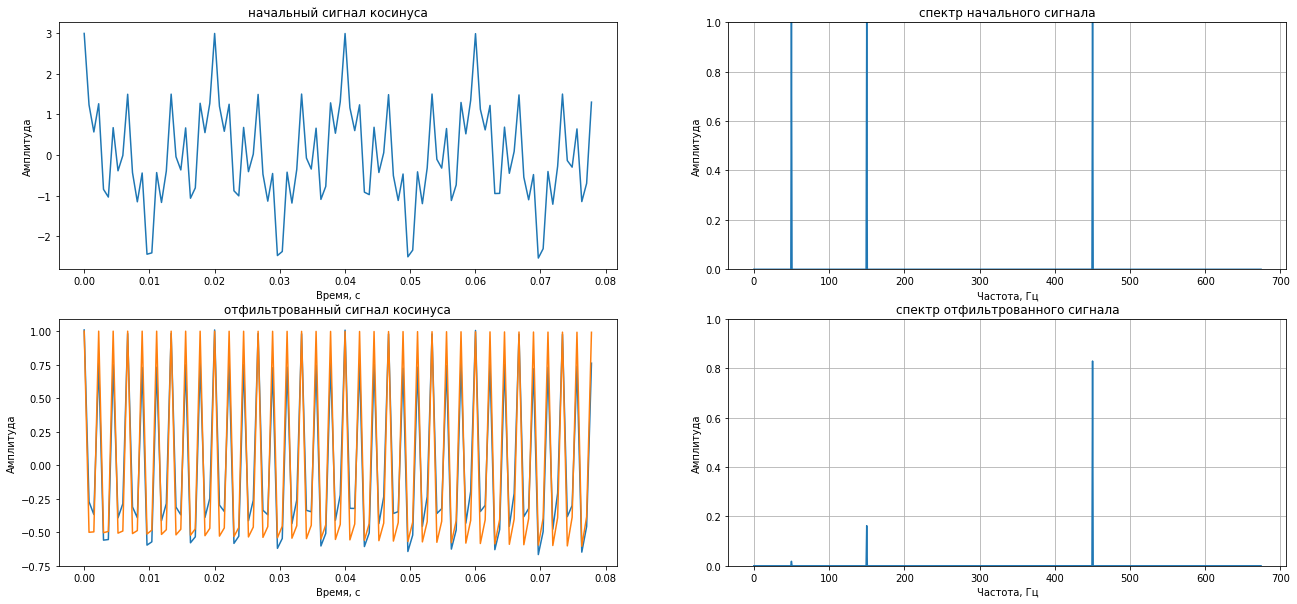

In [198]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//16], y_func[i][:N//16])
    if i == 1: ax_row[0].plot(x[:N//16], f_cos(x, freq_3)[:N//16])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

# Task 4

Полосовой Фильтр

In [168]:
def bandpass_filter(freq, freq_l, freq_r):
    return low_pass_filter(freq, freq_r) * high_pass_filter(freq, freq_l)

freq_filter = abs(bandpass_filter(xff, 110, 250))

График полосового фильтра

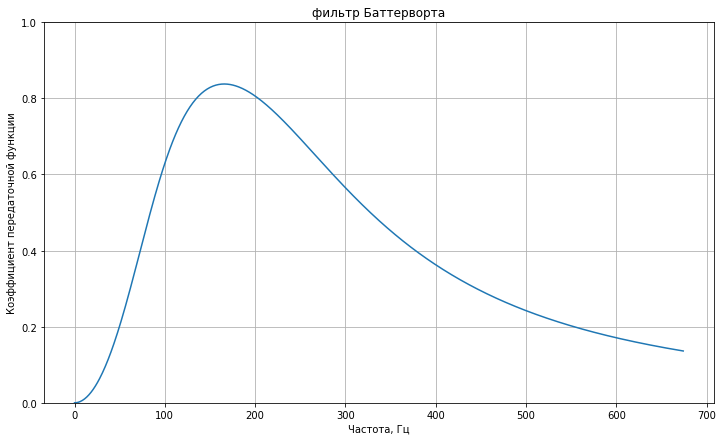

In [169]:
plt.figure(figsize=(12, 7))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

Фильтруем сигнал

In [170]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ПФ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


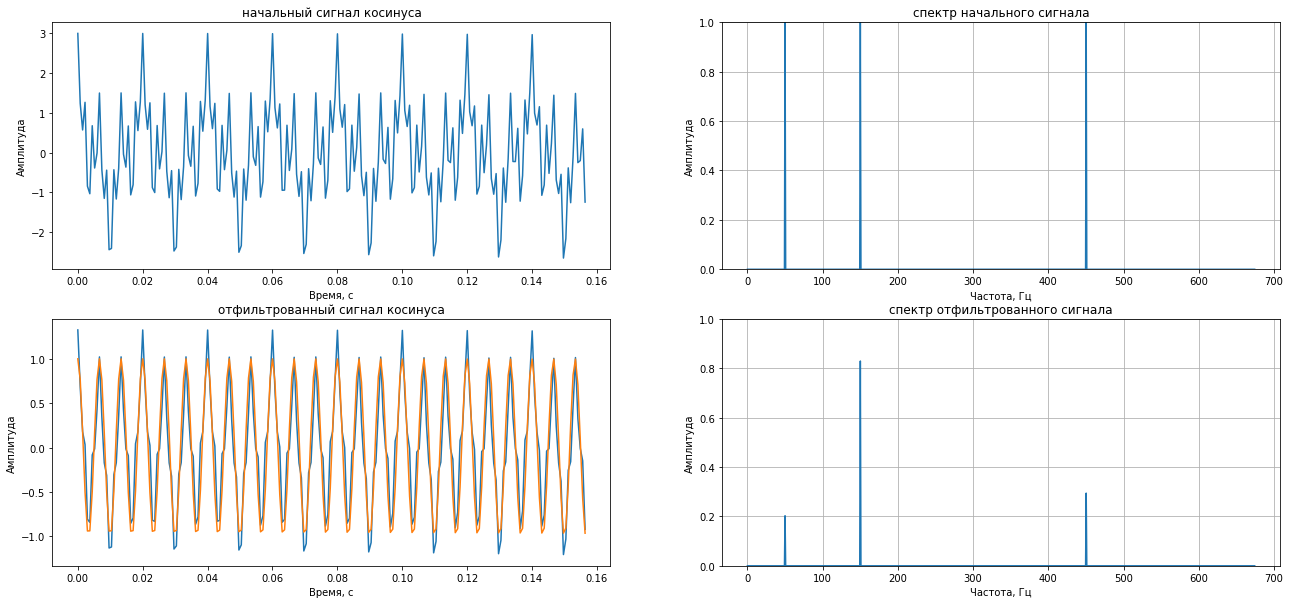

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    if i == 1: ax_row[0].plot(x[:N//8], f_cos(x, freq_2)[:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

Заграждающий фильтр

In [172]:
def blocking_filter(freq, freq_l, freq_r):
    return low_pass_filter(freq, freq_l) + high_pass_filter(freq, freq_r)

freq_filter = abs(blocking_filter(xff, 60, 350))

График заграждающего фильтра

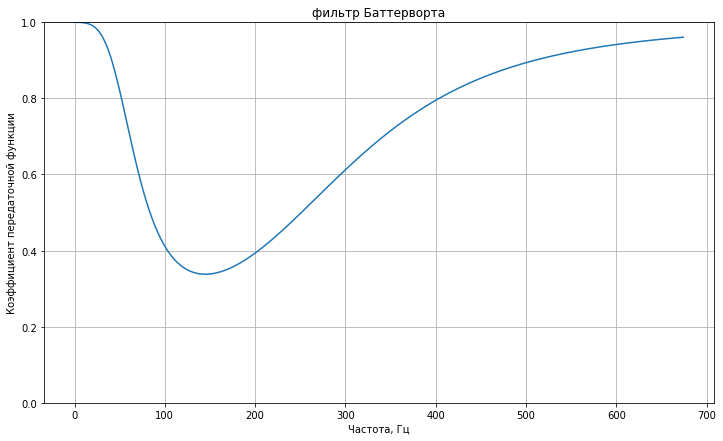

In [173]:
plt.figure(figsize=(12, 7))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

Фильтруем сигнал

In [174]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ЗФ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


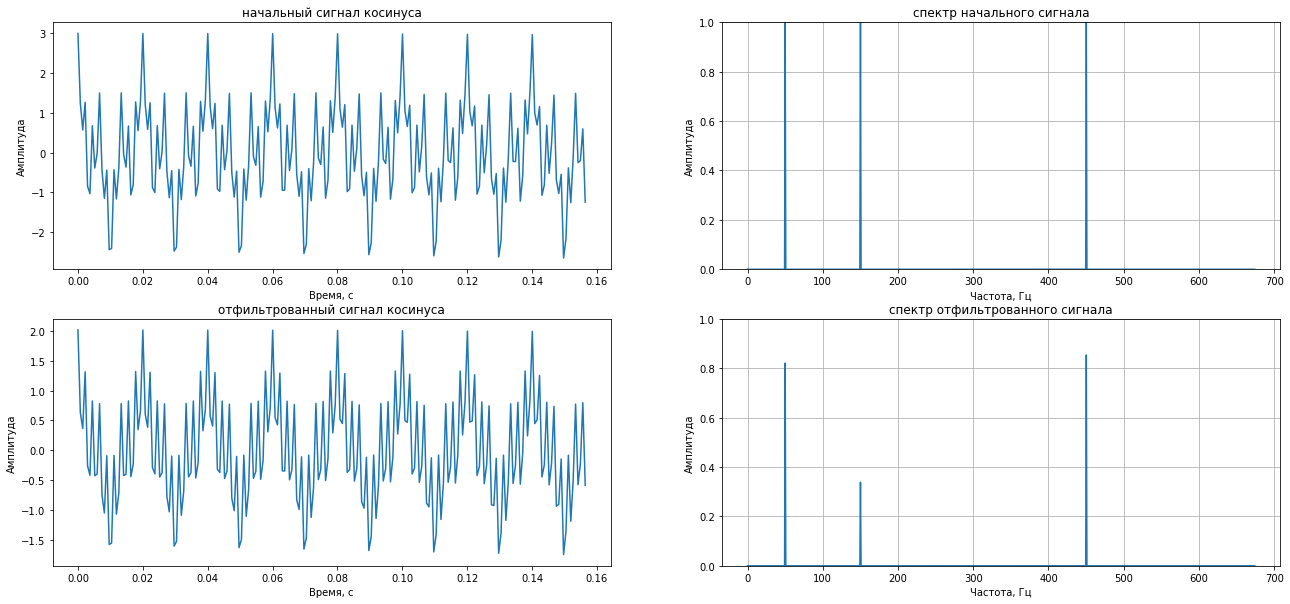

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

# Task 5

Функция фильтра Баттерворта n-го порядка (ФНЧ)

In [176]:
def low_pass_n_filter(freq, freq_c, n):
    poles = []
    for k in range(n):
        angle = np.pi * (n + 2*k + 1) / (2 * n)
        pole = np.exp(1j * angle)
        poles.append(pole)

    s = 1j * freq / freq_c
    
    polynomial = 1
    for pole in poles:
        polynomial *= (s - pole)

    return 1 / polynomial

Графики филтра Баттерворта 3-го и 4-го порядков (ФНЧ)

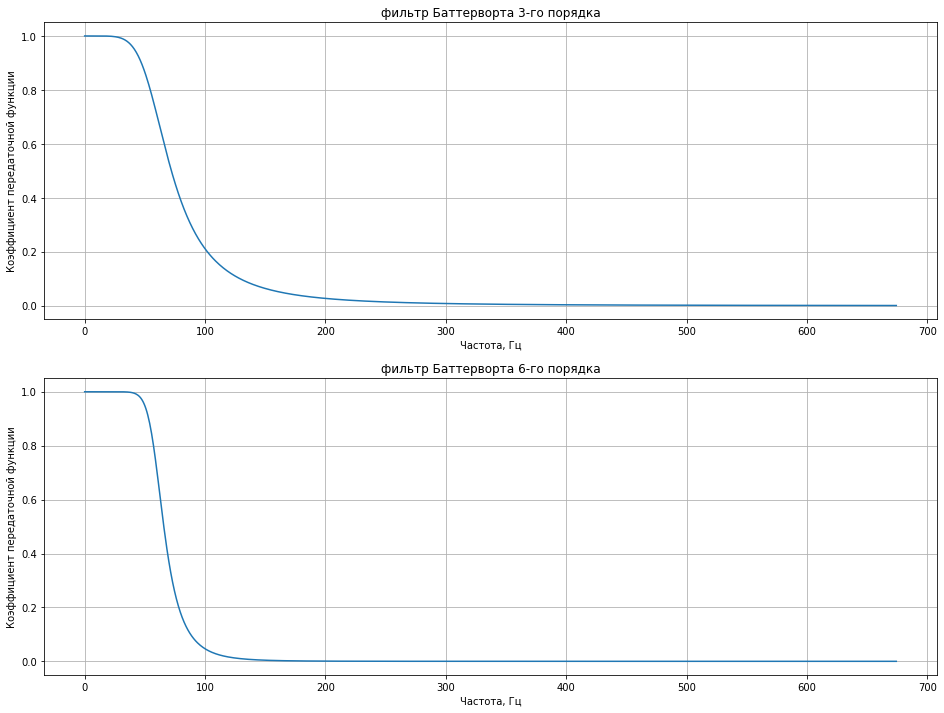

In [177]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

for i, n in enumerate([3, 6]):
    freq_filter = abs(low_pass_n_filter(xf, 60, n))
    axes[i].plot(xf, freq_filter)
    axes[i].set_title(f"фильтр Баттерворта {n}-го порядка")
    axes[i].set_xlabel("Частота, Гц")
    axes[i].set_ylabel("Коэффициент передаточной функции")
    axes[i].grid()

plt.show()

Находим фильтр Баттерворта 4-го порядка

In [178]:
freq_filter = abs(low_pass_n_filter(xff, 60, 4))

Фильтруем сигнал

In [179]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ФНЧ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


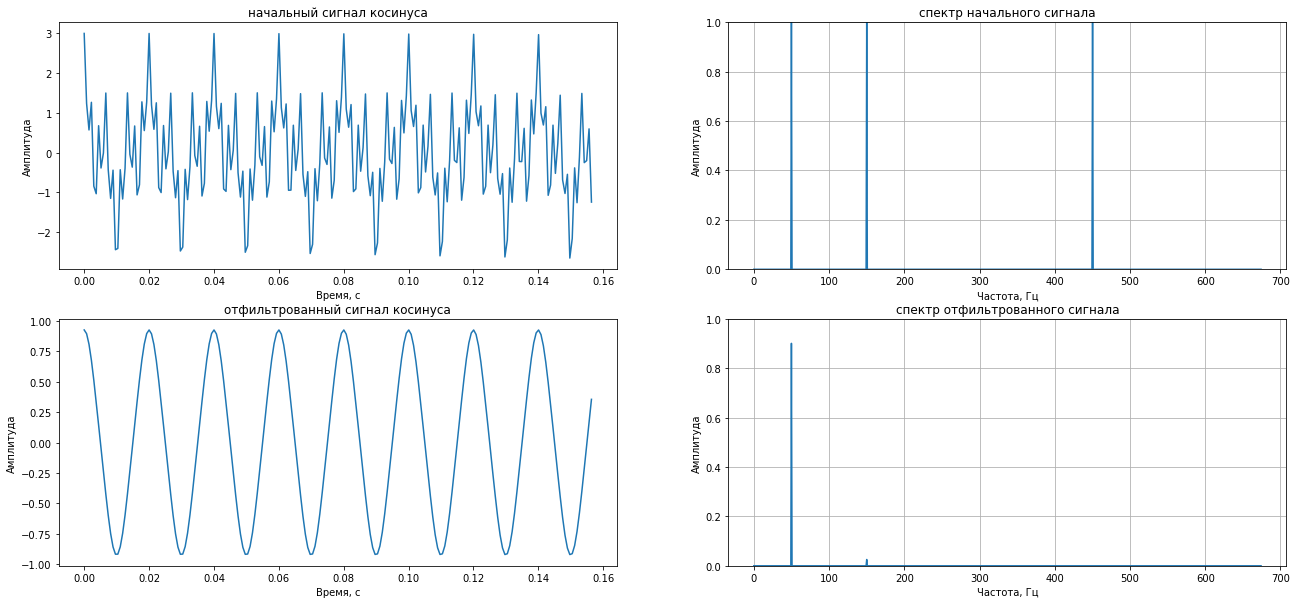

In [180]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

# Task 6

Задаем зашумленный сигнал

In [181]:
y_noise = f_cos(x, freq_1) + f_cos(x, freq_2) + f_cos(x, freq_3) + np.random.normal(size=len(x))

График зашумленного сигнала

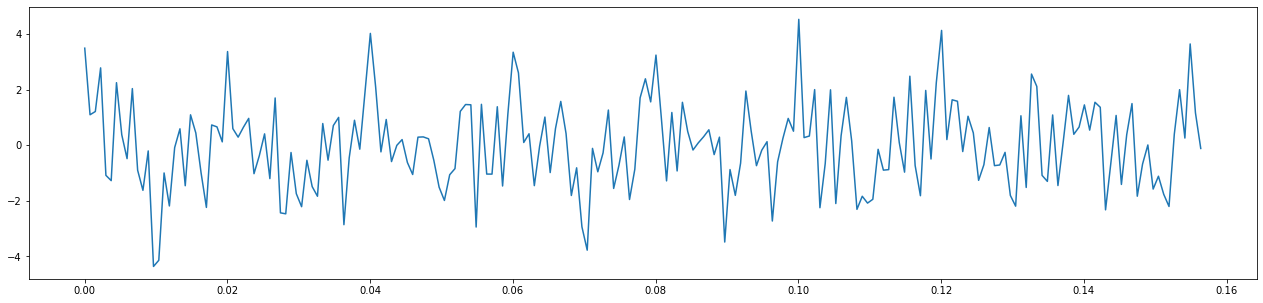

In [182]:
plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], y_noise[0:N//8])
plt.show()

Находим спектр зашумленного сигнала

In [183]:
yff_noise = fft.fft(y_noise)
yf_noise = abs(yff_noise[:N//2])
xff = fft.fftfreq(N, T)
xf = xff[:N//2]

Выводим спектр зашумленного сигнала

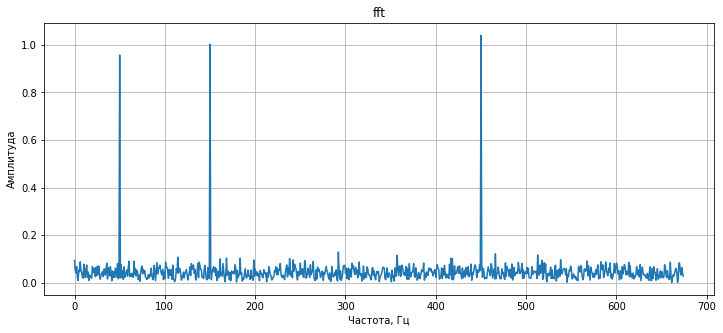

In [184]:
plt.figure(figsize=(12, 5))

plt.plot(xf, yf_noise * 2 / N)
plt.title("fft")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()

plt.show()

Находим фильтр Баттерворта (ФНЧ)

In [201]:
freq_filter = abs(low_pass_n_filter(xff, 70, 6))

Фильтруем зашумленный сигнал

In [202]:
y_filtered = freq_filter * yff_noise
yif = fft.ifft(y_filtered)

Выводим графики начального и отфильтрованного сигналов (ФНЧ)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


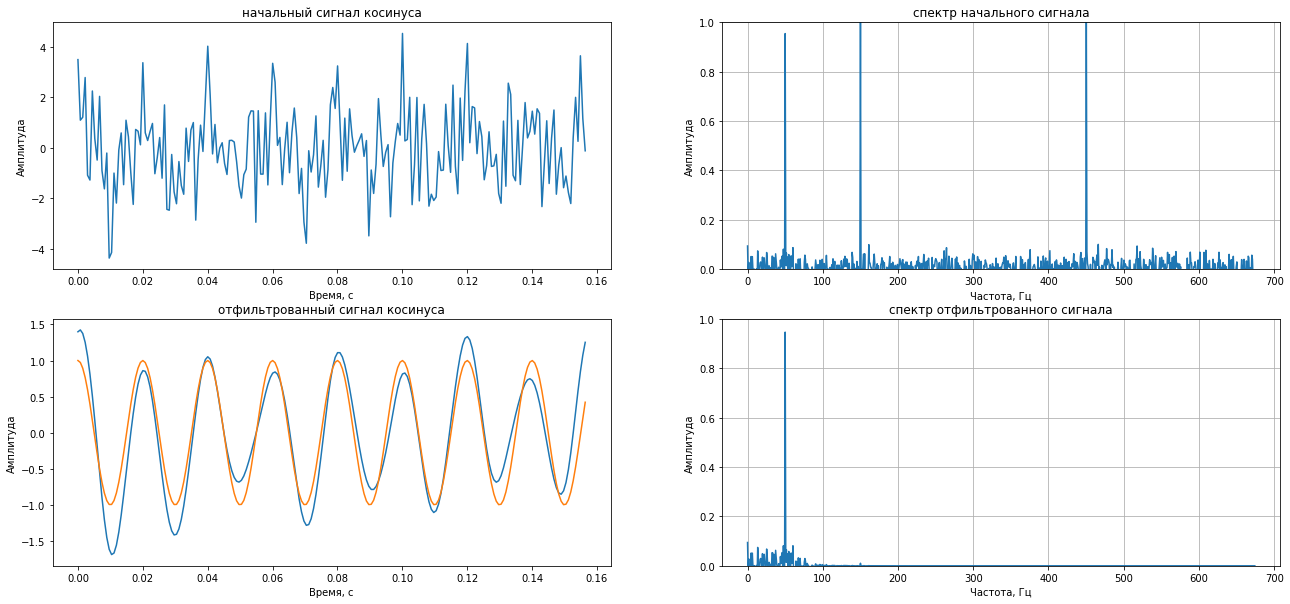

In [204]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff_noise, y_filtered]
y_func = [y_noise, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    if i == 1: ax_row[0].plot(x[:N//8], f_cos(x, freq_1)[:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()